# **Terra**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

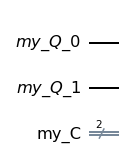

In [2]:
# Import registers
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'my_Q')
cr = ClassicalRegister(2, 'my_C')
qc = QuantumCircuit(qr,cr)
qc.draw()

In [3]:
qc = QuantumCircuit(QuantumRegister(2, 'my_Q'), ClassicalRegister(2, 'my_C'))

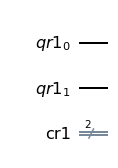

In [4]:
#Import the register classes
from qiskit import QuantumRegister, ClassicalRegister
#Create the quantum and classical registers, each with labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
#Create the quantum circuit using the registers
qc1 = QuantumCircuit(qr1, cr1)
#Draw the circuit
qc1.draw()

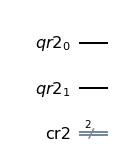

In [5]:
#Create two Quantum and Classical registers
qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
#Create a second circuit using the registers created above
qc2 = QuantumCircuit(qr2, cr2)
#Draw the second quantum circuit
qc2.draw()

/tmp/ipykernel_290/3990196396.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc_combined = qc1 + qc2


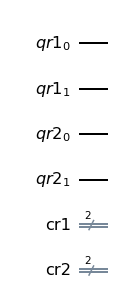

In [6]:
#Concatenate the two previous circuits to create a new circuit
qc_combined = qc1 + qc2
#Draw the concatenated circuit
qc_combined.draw()

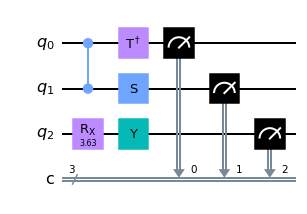

In [7]:
#Import the random_circuit class
from qiskit.circuit.random import random_circuit
#Construct the random circuit with the number of qubits = 3
#with a depth = 2, and include the measurement operator for each qubit
qc = random_circuit(3, 2, measure=True)
#Draw the circuit
qc.draw()

/tmp/ipykernel_290/1873730776.py:7: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc1 + qc2


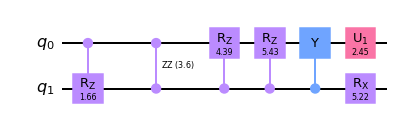

In [8]:
# Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits, each with 2 qubit registers and random #gate operator counts.
qc1 = random_circuit(2,2)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1 + qc2
#Draw the circuit
qc.draw()

In [9]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ',width) 
    print('Depth = ', depth)
    print('Circuit size = ',circuit_size)
    print('Number of operators = ', num_operators)

In [10]:
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)

Width =  2
Depth =  6
Circuit size =  7
Number of operators =  OrderedDict([('crz', 3), ('rzz', 1), ('cy', 1), ('rx', 1), ('u1', 1)])


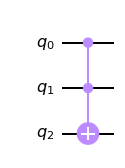

In [11]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()

In [12]:
#Print out the circuit properties
print_circuit_props(qc)

Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('ccx', 1)])


In [13]:
#Print out the circuit properties
print_circuit_props(qc.decompose())

Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


## **Customization and Parameterization of Circuits**

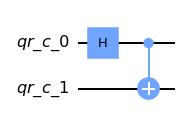

In [14]:
#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c')
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='my-composite')
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting 
#the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw()

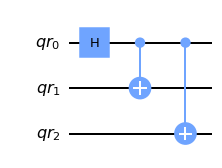

In [15]:
#Create your 2-qubit circuit to generate your composite gate
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function 
#of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw()

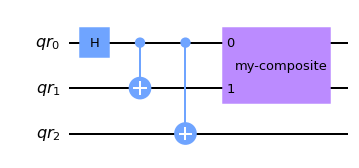

In [16]:
#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw()

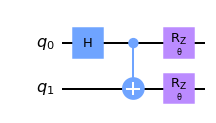

In [17]:
#Import the Parameter object
from qiskit.circuit import Parameter
#Construct the Parameter set to Theta
param_theta = Parameter('θ')
#Create a two-qubit quantum circuit and add some gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#Include a rotation gate which we wish to apply 
#the Parameter value 
qc.rz(param_theta,0)
qc.rz(param_theta,1)
#Draw the circuit
qc.draw()

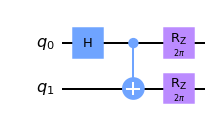

In [18]:
import numpy as np
#Bind the parameters with a value, in this case 2π
qc = qc.bind_parameters({param_theta: 2*np.pi})
#Draw the circuit with the set parameter values
qc.draw()

## **Generating Pulse Schedules on Quantum Hardware**

In [20]:
#Import pulse classes
from qiskit.pulse import DriveChannel, Play, Schedule
from qiskit.pulse.library import Waveform
#Import some helpful utils
from qiskit.scheduler.utils import measure_all

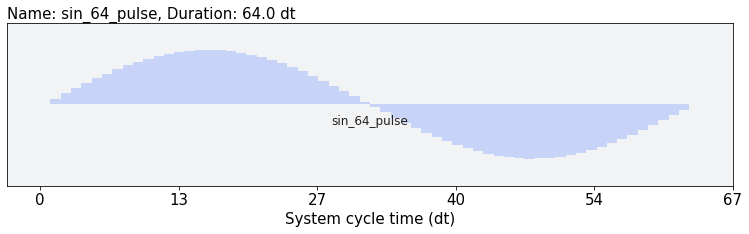

In [21]:
#Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
#Generate our Waveform 
wave_form = Waveform(data, name="sin_64_pulse")
#Draw the generated sample pulse
wave_form.draw()

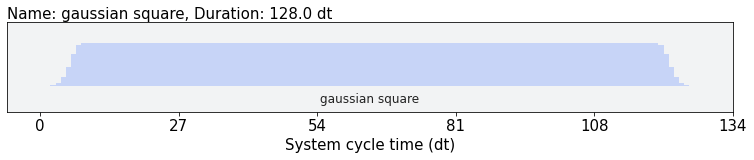

In [25]:
#Import the Gaussian Square pulse from Pulse Library
from qiskit.pulse.library import GaussianSquare
#Create a Gaussian Square pulse: 
#Args: duration, amp, sigma, width, name
gaussian_square_pulse = GaussianSquare(128,1,2, width=112, risefall_sigma_ratio=None, name="gaussian square", limit_amplitude=None)
gaussian_square_pulse.draw()

## **Generating and executing Schedules**

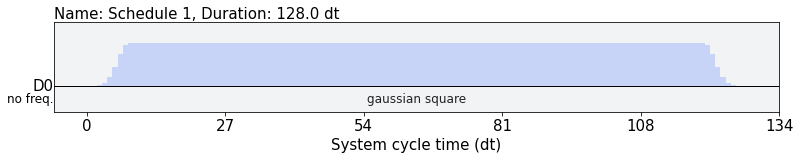

In [26]:
#Create the first schedule with our Gaussian Square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
#Draw the schedule
schedule_1.draw()

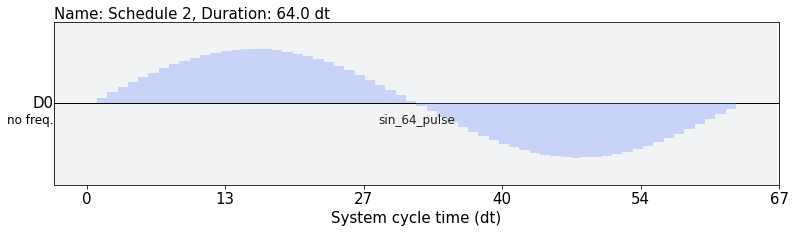

In [28]:
#Create a second schedule with our sample pulse
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(wave_form, DriveChannel(0)))
#Draw the schedule
schedule_2.draw()

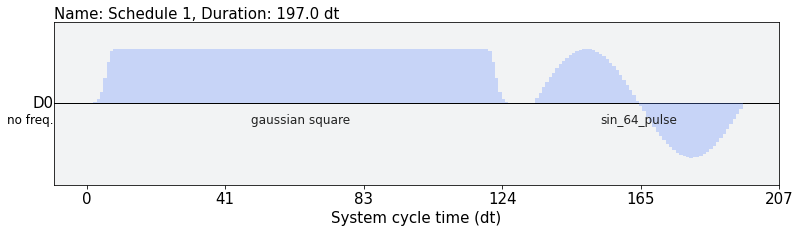

In [29]:
#Let's create a third schedule 
#Where we add the first schedule and second schedules
#And shift the second to the right by a time of 5 after the first
schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2)
schedule_3.draw()

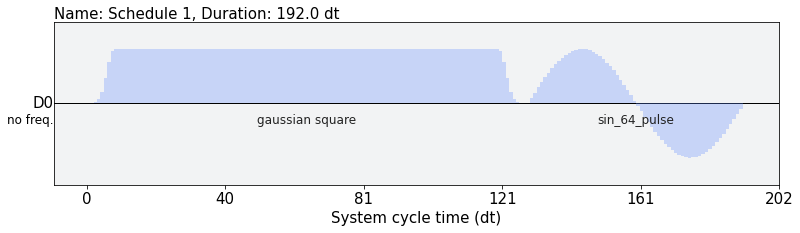

In [30]:
#We could have also combined the two using the append operator
#The two schedules are appended immediately after one another
schedule_3_append = schedule_1.append(schedule_2)
schedule_3_append.draw()

## **Scheduling existing quantum circuits**

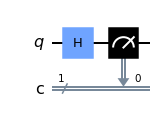

In [31]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0,0)
#Draw the circuit
qc.draw()

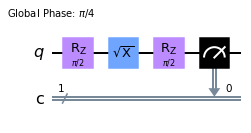

In [32]:
#Import transpile and schedule
from qiskit import transpile, schedule 
#Set the backend to ibmq_armonk
backend = provider.get_backend('ibmq_armonk')
#Transpile the circuit using basis gates from the specified backend
transpiled_qc = transpile(qc, backend)  
#Draw the transpiled circuit
transpiled_qc.draw()

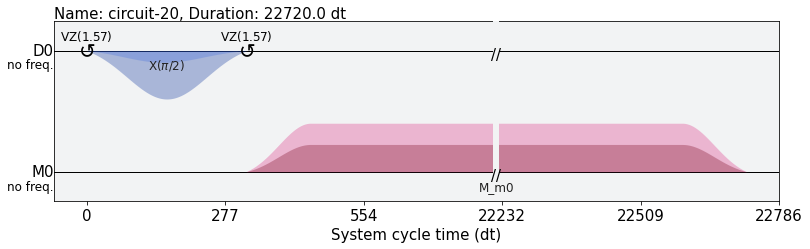

In [33]:
#Create the circuit schedule using the transpiled circuit
circuit_schedule = schedule(transpiled_qc, backend)
#Draw the circuit
circuit_schedule.draw()

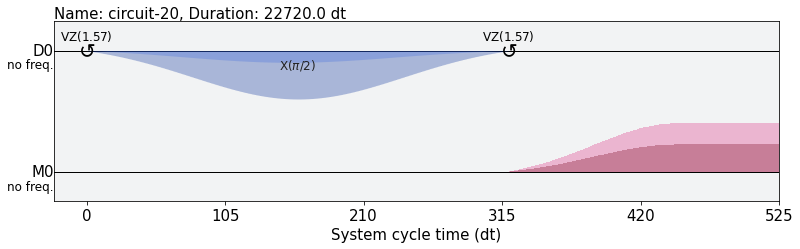

In [37]:
#Draw the circuit with a shorter time range to ease visibility
circuit_schedule.draw(time_range=[0, 500])

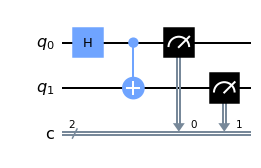

In [38]:
#Create a 2-qubit circuit
qc2 = QuantumCircuit(2, 2)
#Apply a Hadamard to the first qubit
qc2.h(0)
#Apply a CNOT gate where the Source is qubit 0, and Target qubit 1
qc2.cx(0, 1)
#Add measurement gates to all qubits
qc2.measure([0, 1], [0, 1])
#Draw the circuit
qc2.draw()

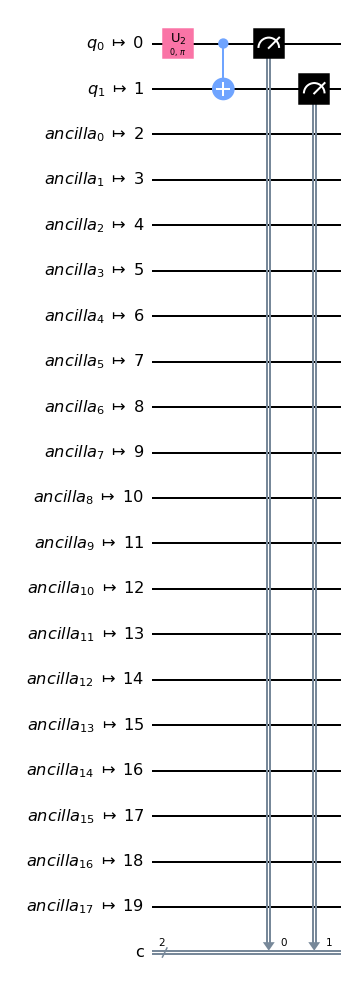

In [39]:
#Import the test backend
from qiskit.test.mock import FakeAlmaden
#Construct the backend
backend = FakeAlmaden()
#Transpile the circuit to the test backend and its basis states
transpiled_qc2 = transpile(qc2, backend)
#Draw the transpiled circuit
transpiled_qc2.draw()

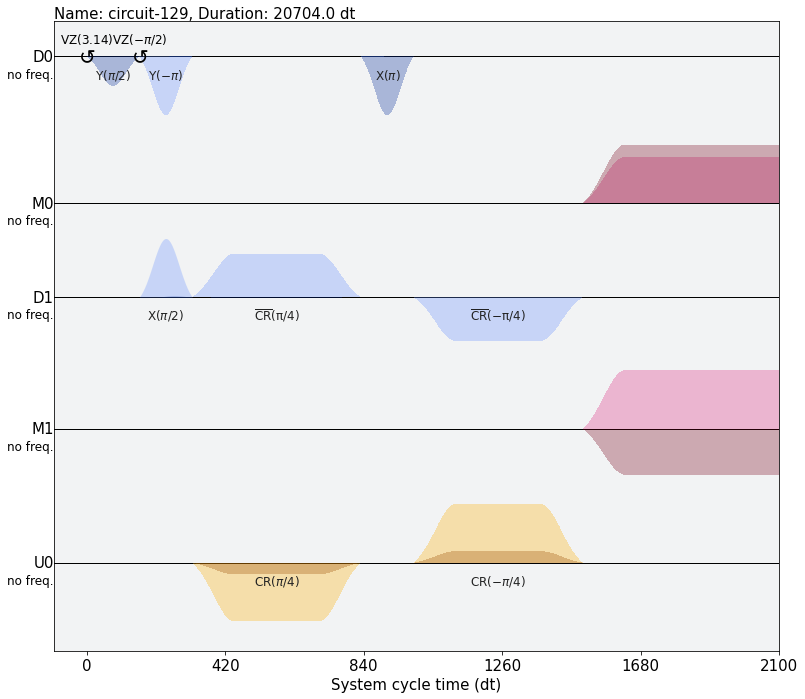

In [41]:
#Create the circuit from the transpiled circuit results
circuit_schedule2 = schedule(transpiled_qc2, backend)
#Draw the 2-qubit circuit schedule with range of 2000 time steps
circuit_schedule2.draw(time_range=[0, 2000])

## **Leveraging Provider information**

In [42]:
#Import the IBMQ interface
from qiskit import IBMQ

#Save account ONLY needed if running on a local system for first time
#Uncomment below if running for the first time on a local machine.
#IBMQ.save_account('API_TOKEN') 

#Load the account which was saved on local system using save_account.
#Note: this is handled each time a Qiskit Notebook is loaded on IQX.
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-18 06:45:09,200: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
#Indicate a hub to link account to:
IBMQ.get_provider(hub='ibm-q')
#Indicate a project which your account is associated with
IBMQ.get_provider(project='main')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [47]:
#Create the Provider object using the IBMQ interface 
provider = IBMQ.get_provider(group='open')
#Query the list of backends available to your account
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [48]:
#Filter the list of backends to include only non-simulator, 
#and operational (meaning, not offline or under maintenance)
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [49]:
#Select a specific device from the provider
backend = provider.get_backend('ibmq_lima')

In [54]:
#Import the least_busy function
from qiskit.providers.ibmq import least_busy

#Identify the least busy devices 
#smaller than 6 qubits and not a simulator
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits < 6 and not x.configuration().simulator)

#Identify the least busy devices 
#larger than 6 qubits and not a simulator
large_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 6 and not x.configuration().simulator)

#Print the least busy devices
print('The least busy small devices: {}'.format(least_busy(small_devices)))
print('The least busy large devices: {}'.format(least_busy(large_devices)))

The least busy small devices: ibmq_bogota
Traceback (most recent call last):
  Input In [54] in <module>
    print('The least busy large devices: {}'.format(least_busy(large_devices)))
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/__init__.py:142 in least_busy
    raise IBMQError('Unable to find the least_busy '
IBMQError: 'Unable to find the least_busy backend from an empty list.'

Use %tb to get the full traceback.


## **Quantum backend components**

In [55]:
#Set ibmq_lima as the backend, or whichever backend you wish
backend = provider.get_backend('ibmq_lima')
#Confirm this is the backend selected by querying for its name,
backend.name()

'ibmq_lima'

In [56]:
#View the status of the backend
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print('Number of pending jobs in the queue: ', jobs_in_queue)

Number of pending jobs in the queue:  56


In [57]:
#View the configuration of the backend
backend.configuration()
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [58]:
# Display the number of qubits from the backend properties
backend.properties().qubits

[[Nduv(datetime.datetime(2022, 1, 18, 5, 18, 10, tzinfo=tzlocal()), T1, us, 116.61434014337499),
  Nduv(datetime.datetime(2022, 1, 18, 5, 18, 44, tzinfo=tzlocal()), T2, us, 190.7616020143424),
  Nduv(datetime.datetime(2022, 1, 18, 5, 47, 18, tzinfo=tzlocal()), frequency, GHz, 5.029752763617062),
  Nduv(datetime.datetime(2022, 1, 18, 5, 47, 18, tzinfo=tzlocal()), anharmonicity, GHz, -0.33574155258829724),
  Nduv(datetime.datetime(2022, 1, 18, 5, 17, 31, tzinfo=tzlocal()), readout_error, , 0.02200000000000002),
  Nduv(datetime.datetime(2022, 1, 18, 5, 17, 31, tzinfo=tzlocal()), prob_meas0_prep1, , 0.028800000000000048),
  Nduv(datetime.datetime(2022, 1, 18, 5, 17, 31, tzinfo=tzlocal()), prob_meas1_prep0, , 0.0152),
  Nduv(datetime.datetime(2022, 1, 18, 5, 17, 31, tzinfo=tzlocal()), readout_length, ns, 5351.11111111111)],
 [Nduv(datetime.datetime(2022, 1, 18, 5, 18, 10, tzinfo=tzlocal()), T1, us, 101.8379516834072),
  Nduv(datetime.datetime(2022, 1, 18, 5, 19, 40, tzinfo=tzlocal()), T2, u

In [59]:
#Print out the frequency of qubit (0)
print('Frequency of first qubit is: '+ str(backend.properties().frequency(0)))
#Print out the readout error of qubit (0)
print('Readout error of first qubit is: '+ str(backend.properties().readout_error(0)))

Frequency of first qubit is: 5029752763.617063
Readout error of first qubit is: 0.02200000000000002


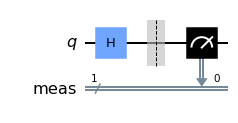

In [60]:
#Run a few jobs on this backend to generate jobs on the backend
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw()

In [61]:
# Launch the job watcher widget
%qiskit_job_watcher

for i in range(0,3):
    result = execute(qc, backend, shots=1024).result()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [64]:
#List out the last 3 jobs we ran on the device
for executed_job in backend.jobs(limit=3):
    print('Job id: '
          + str(executed_job.job_id()) + ', ' 
          + str(executed_job.creation_date) + ', ' 
          + str(executed_job.status()))

Job id: 61e6676184e3d23cb536100d, <bound method IBMQJob.creation_date of <qiskit.providers.ibmq.job.ibmqjob.IBMQJob object at 0x7f9dfd384cd0>>, JobStatus.DONE
Job id: 61e66743658f81014d6fef02, <bound method IBMQJob.creation_date of <qiskit.providers.ibmq.job.ibmqjob.IBMQJob object at 0x7f9dfd695f70>>, JobStatus.DONE
Job id: 61e6673082ce86dee0b42d52, <bound method IBMQJob.creation_date of <qiskit.providers.ibmq.job.ibmqjob.IBMQJob object at 0x7f9dfd14cf70>>, JobStatus.DONE


## **Understanding the Job component**

In [65]:
#From the previous output of executed jobs, enter its job id.
job = backend.retrieve_job(executed_job.job_id())

In [66]:
#Print the job instance status
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [67]:
job.result()

Result(backend_name='ibmq_lima', backend_version='1.0.27', qobj_id='c54368c0-7559-42a8-8d18-141ea4251bfa', job_id='61e6673082ce86dee0b42d52', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 548, '0x1': 476}), header=QobjExperimentHeader(clbit_labels=[['meas', 0]], creg_sizes=[['meas', 1]], global_phase=0.7853981633974483, memory_slots=1, metadata={}, n_qubits=5, name='circuit-134', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-18 07:07:42+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_lima', backend_version='1.0.27'), execution_id='52c2bc72-782d-11ec-9015-b02628f7f59e', time_taken=3.0157341957092285, error=None, client_version={'qiskit': '0.34.1'})

In [68]:
job.backend()

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
import qiskit.tools.jupyter
%qiskit_version_table